In [2]:
import os
import sys
import importlib

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from lyubishchev.cli import last
from icecream import ic
ic.disable()

report = last(10)

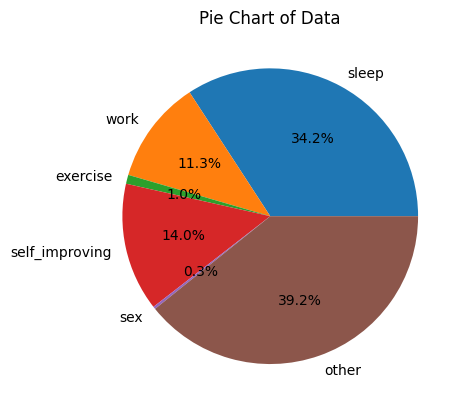

In [4]:
from nb_helper_time_stats import show_time_stat_as_piechart

show_time_stat_as_piechart(report.get_time_stats())